<a id="home"></a>
![Final Lesson Exercise](images/Banner_FEX.png)

# Lesson #10: Clustering

## About this assignment
In this assignment, you will explore [information regarding customers spendings](#dataset_desc), in order to learn learn customer segmentations.<br/>

This time you will practice the clustering flow and the use of clustering algorithms.

## Preceding Step - import modules (packages)
This step is necessary in order to use external packages. 

**Use the following libraries for the assignment, when needed**:

In [70]:
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# === CELL TYPE: IMPORTS AND SETUP 

import os                       # for testing use only

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import sklearn
from sklearn import cluster

from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

<a id="dataset_desc"></a>
[Go back to the beginning of the assignment](#home)
## The mall customer information dataset
In this assignment, you will explore information regarding customers spendings.<br/>
**The mall customer information dataset, includes the following features**:<br/>
* CustomerID: Unique customer ID 
* Gender: customer's gender 
* Age: customer's age
* Annual Income (k NIS): customer's annual income
* Customer Score (1-100): customer shopping potential score<br />

[go to basic data exploration](#data_exploration)

## 1. Load the dataset and prepare dataset for clustering
In this section you will perform the following actions:<br />
* Load the mall customers dataset
* Remove missing values
* Remove duplicate rows
* Transfer string to numeric
* Scale features

### 1.a. Instructions
<u>method name</u>: <b>load_dataset</b>
<pre>The following is expected:
--- Complete the 'load_dataset' function to load the mall customer information dataset from the 'file_name' csv file
  into a pandas dataframe.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return df_dataset</b>

In [71]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [72]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def load_dataset(file_name):
    return pd.read_csv(file_name)


In [73]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
raw_dataset = load_dataset(file_name)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [74]:
# 1.a. 
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [75]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.a. - Test 1 (name: test1a-1_load_dataset, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'load_dataset' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
print ("Good Job!\nYou've passed the 1st test for the 'load_dataset' function implementation :-)")

Part 1.a. - Test 1 (name: test1a-1_load_dataset, points: 0.1) - Sanity
	--->Testing the implementation of 'load_dataset' ...
Good Job!
You've passed the 1st test for the 'load_dataset' function implementation :-)


In [76]:
# 1.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.a. - Test 2 (name: test1a-2_load_dataset, points: 0.2)")
print ("\t--->Testing the implementation of 'load_dataset' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
assert raw_dataset.shape == (211, 5) , 'Wrong shape for dataset dataframe'

print ("Good Job!\nYou've passed the 2nd test for the 'load_dataset' function implementation :-)")
raw_dataset.head()

Part 1.a. - Test 2 (name: test1a-2_load_dataset, points: 0.2)
	--->Testing the implementation of 'load_dataset' ...
Good Job!
You've passed the 2nd test for the 'load_dataset' function implementation :-)


,customer_id,gender,age,annual_income,customer_score
0,10001175,female,24.5,51.2,77.5
1,10000426,male,38.0,278.4,63.5
2,10001018,female,65.0,128.0,55.5
3,10000825,male,18.5,236.8,10.5
4,10000859,female,74.0,252.8,35.5


### 1.b. Remove missing values
In this section you need to remove rows with missing values.

### 1.b. Instructions
<u>method name</u>: <b>remove_missing_values</b>
<pre>The following is expected:
--- Complete the 'remove_missing_values' function to return a copy of the dataframe, 
   in which you remove all rows with one or more missing values.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return dataset_cleaned</b>

In [77]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [78]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def remove_missing_values(dataset):
    return dataset.dropna()


In [79]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [80]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [81]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.b. - Test 1 (name: test1b-1_remove_missing_values, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'remove_missing_values' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'remove_missing_values' function implementation :-)")

Part 1.b. - Test 1 (name: test1b-1_remove_missing_values, points: 0.1) - Sanity
	--->Testing the implementation of 'remove_missing_values' ...
Good Job!
You've passed the 1st test for the 'remove_missing_values' function implementation :-)


In [82]:
# 1.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.b. - Test 2 (name: test1b-2_remove_missing_values, points: 0.2)")
print ("\t--->Testing the implementation of 'remove_missing_values' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
assert cln_dataset.shape == (207, 5), "Wrong shape for dataset dataframe, after running 'remove_missing_values'" 

print ("Good Job!\nYou've passed the 2nd test for the 'remove_missing_values' function implementation :-)")

Part 1.b. - Test 2 (name: test1b-2_remove_missing_values, points: 0.2)
	--->Testing the implementation of 'remove_missing_values' ...
Good Job!
You've passed the 2nd test for the 'remove_missing_values' function implementation :-)


### 1.c. Remove duplicate rows
In this section you need to remove duplicate rows.

### 1.c. Instructions
<u>method name</u>: <b>remove_duplicate_rows</b>
<pre>The following is expected:
--- Complete the 'remove_duplicate_rows' function to return a copy of the dataframe, 
   in which you remove all rows with duplicate rows.
   Note: in case of duplicate rows, leave only the first occurrence.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return dataset_cleaned</b>

In [83]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [84]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def remove_duplicate_rows(dataset):
    return dataset.drop_duplicates()


In [85]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
raw_dataset = load_dataset(file_name)
cln_dataset = remove_duplicate_rows(raw_dataset)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [86]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [87]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.c. - Test 1 (name: test1c-1_remove_duplicate_rows, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'remove_duplicate_rows' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_duplicate_rows(raw_dataset)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'remove_duplicate_rows' function implementation :-)")

Part 1.c. - Test 1 (name: test1c-1_remove_duplicate_rows, points: 0.1) - Sanity
	--->Testing the implementation of 'remove_duplicate_rows' ...
Good Job!
You've passed the 1st test for the 'remove_duplicate_rows' function implementation :-)


In [88]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.c. - Test 2 (name: test1c-2_remove_duplicate_rows, points: 0.1)")
print ("\t--->Testing the implementation of 'remove_duplicate_rows' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_duplicate_rows(raw_dataset)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
assert cln_dataset.shape == (204, 5), "Wrong shape for dataset dataframe, after running 'remove_duplicate_rows'" 

print ("Good Job!\nYou've passed the 2nd test for the 'remove_duplicate_rows' function implementation :-)")

Part 1.c. - Test 2 (name: test1c-2_remove_duplicate_rows, points: 0.1)
	--->Testing the implementation of 'remove_duplicate_rows' ...
Good Job!
You've passed the 2nd test for the 'remove_duplicate_rows' function implementation :-)


In [89]:
# 1.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.c. - Test 3 (name: test1c-3_remove_duplicate_rows, points: 0.1)")
print ("\t--->Testing the implementation of 'remove_duplicate_rows' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
assert cln_dataset.shape == (200, 5), "Wrong shape for dataset dataframe, after running 'remove_duplicate_rows'" 

print ("Good Job!\nYou've passed the 3rd test for the 'remove_duplicate_rows' function implementation :-)")

Part 1.c. - Test 3 (name: test1c-3_remove_duplicate_rows, points: 0.1)
	--->Testing the implementation of 'remove_duplicate_rows' ...
Good Job!
You've passed the 3rd test for the 'remove_duplicate_rows' function implementation :-)


### 1.d. Transfer string to numeric
In this section you need to string to numeric values.

### 1.d. Instructions
<u>method name</u>: <b>transfer_str_to_numeric_vals</b>
<pre>The following is expected:
--- Complete the 'transfer_str_to_numeric_vals' function to return a copy of the dataframe, 
   in which you transfer all the string values in the 'mall customer information' dataset to numeric.

Notes: 
      * 'str_col' is the only column with string values. Transfer the unique string values to unique numeric values.
      * You also need to remove the 'id_col_to_remove' column.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return dataset_transferred</b>

In [90]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
raw_dataset.head()


,customer_id,gender,age,annual_income,customer_score
0,10001175,female,24.5,51.2,77.5
1,10000426,male,38.0,278.4,63.5
2,10001018,female,65.0,128.0,55.5
3,10000825,male,18.5,236.8,10.5
4,10000859,female,74.0,252.8,35.5


In [91]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def transfer_str_to_numeric_vals(dataset,str_col,id_col_to_remove):
    dataset = dataset.drop(columns=[id_col_to_remove])
    unique_values = set(dataset[str_col])
    mapping_dict = {value: index for index, value in enumerate(unique_values)}
    dataset[str_col] = dataset[str_col].map(mapping_dict)
    return dataset

In [92]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [93]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
num_dataset.head()


,gender,age,annual_income,customer_score
0,0,24.5,51.2,77.5
1,1,38.0,278.4,63.5
2,0,65.0,128.0,55.5
3,1,18.5,236.8,10.5
4,0,74.0,252.8,35.5


In [94]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.d. - Test 1 (name: test1d-1_transfer_str_to_numeric_vals, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'transfer_str_to_numeric_vals' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'transfer_str_to_numeric_vals' function implementation :-)")

Part 1.d. - Test 1 (name: test1d-1_transfer_str_to_numeric_vals, points: 0.1) - Sanity
	--->Testing the implementation of 'transfer_str_to_numeric_vals' ...
Good Job!
You've passed the 1st test for the 'transfer_str_to_numeric_vals' function implementation :-)


In [95]:
# 1.d.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.d. - Test 2 (name: test1d-2_transfer_str_to_numeric_vals, points: 0.2)")
print ("\t--->Testing the implementation of 'transfer_str_to_numeric_vals' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert num_dataset.shape == (200, 4), "Wrong shape for dataset dataframe, after running 'transfer_str_to_numeric_vals'" 
assert list(num_dataset.select_dtypes(include=['number']).columns) == ['gender', 'age', 'annual_income', 'customer_score'], 'Wrong numeric columns '

print ("Good Job!\nYou've passed the 2nd test for the 'transfer_str_to_numeric_vals' function implementation :-)")

Part 1.d. - Test 2 (name: test1d-2_transfer_str_to_numeric_vals, points: 0.2)
	--->Testing the implementation of 'transfer_str_to_numeric_vals' ...
Good Job!
You've passed the 2nd test for the 'transfer_str_to_numeric_vals' function implementation :-)


### 1.e. Scale features
In this section you will scale your dataset, using the 'StandardScaler' technique

### 1.e. Instructions
<u>method name</u>: <b>scale_dataset</b>
<pre>The following is expected:
--- Complete the 'scale_dataset' function to return a copy of the dataframe, 
   in which you scale the features of the given 'dataset' in the 'mall customer information' dataset.

Notes: 
     * Use the sklearn's StandardScaler for scaling.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return dataset_scaled</b>

In [96]:
# 1.e.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [97]:
# 1.e.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def scale_dataset(dataset):
    return StandardScaler().fit_transform(dataset)


In [98]:
# 1.e.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [99]:
# 1.e.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [100]:
# 1.e.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.e. - Test 1 (name: test1e-1_scale_dataset, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'scale_dataset' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert scl_dataset.shape == (200, 4) , 'Wrong shape for dataset dataframe'

print ("Good Job!\nYou've passed the 1st test for the 'scale_dataset' function implementation :-)")

Part 1.e. - Test 1 (name: test1e-1_scale_dataset, points: 0.1) - Sanity
	--->Testing the implementation of 'scale_dataset' ...
Good Job!
You've passed the 1st test for the 'scale_dataset' function implementation :-)


In [101]:
# 1.e.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 1.e. - Test 2 (name: test1e-2_scale_dataset, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'scale_dataset' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert list(np.round(scl_dataset.mean()+0.0001,2).values)==[0.0, 0.0, 0.0, 0.0], 'Wrong mean scaled values'
assert list(np.round(scl_dataset.std()+0.0001,2).values) ==[1.0, 1.0, 1.0, 1.0], 'Wrong std scaled values'

print ("Good Job!\nYou've passed the 2nd test for the 'scale_dataset' function implementation :-)")

Part 1.e. - Test 2 (name: test1e-2_scale_dataset, points: 0.1) - Sanity
	--->Testing the implementation of 'scale_dataset' ...
Good Job!
You've passed the 2nd test for the 'scale_dataset' function implementation :-)


<a id="data_exploration"></a>
## 2. Basic data exploration
* Perform simple dataset exploration. It is suggested to use describe, info and a simple histogram for features' values
  * You are also advised to plot a scatter plot
  * You could see also the [explanation of the dataset above](#dataset_desc)


In [102]:
# --------------------------- RUN THIS CODE CELL (AFTER YOUR IMPLEMENTATION) -------------------------------------
# Perform a simple dataset exploration. It is sugggested to use describe, info and a simple histogram for features' values
# Transfer dataset's values to numeric ones.
# Use the output of the exploration for next section.
###
### YOUR CODE HERE
###


In [103]:
# --------------------------- RUN THIS CODE CELL (AFTER YOUR IMPLEMENTATION) -------------------------------------
# (OPTIONAL IMPLEMENTATION CELL) add some assitant code or use this
# cell code for you exploration, if needed:
###
### YOUR CODE HERE
###


## 3. Simple call for clustering algorithms

### 3.a. Call K-means algorithm
Complete the 'perform_k_means' function to perform K-means clustering on the <br />
    'mall customer information' dataset, using the given input parameters.<br />

You need to return the trained model and the predicted associated clusters,<br /> 
    for the performed k-means clustering.<br />

<u>Perform K-means clustering</u>:<br/>
creare a k-means clustering model object (using `KMeans`), as following:
* Set the `n_clusters`, `init`, `n_init` and `random_state` parameters.<br/>
* Don't set any other parameters.<br/>
    
After you create the k-means model object, perform `fit` and `predict` to get the trained model and predicted values.

-----------------------

<u>Input parameters</u>:<br />
* dataset      - the dataset to run the K-means clustering on.
* num_clusters - the number of clusters to set the 'n_clusters' parameter with 
* init_val     - the value to set the 'init' method parameter with.
* n_init_val   - the vlue of the number of initializations to set the 'n_init' parameter with.
* rand_state   - the random state, which you should set each of the K-means to run with.

<u>Returned values</u>:<br />
* model - the trained k-means model
* predicted_vals - the predicted values, corresponding to each row in the given input dataset.

-------------------

<u>The return statement should look similar to the following statement</u>:<br />
return `model`, `predicted_vals`

### 3.a. Instructions
<u>method name</u>: <b>perform_k_means</b>
<pre>The following is expected:
--- Complete the 'perform_k_means' function to perform K-means clustering on the 
    'mall customer information' dataset, using the given input parameters.

For more information, see the explanation above.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return model, predicted_vals</b>

In [104]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [105]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def perform_k_means(dataset, num_clusters, init_val, n_init_val, rand_state):
    kmeans_model = KMeans(n_clusters=num_clusters, init=init_val, n_init=n_init_val, random_state=rand_state)
    predicted_vals = kmeans_model.fit_predict(dataset)
    return kmeans_model, predicted_vals


In [106]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 3
init_val ='k-means++'
n_init_val = 5
rand_state = 42
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
kmeans_model, predicted_vals = perform_k_means(scl_dataset, num_clusters, init_val, n_init_val, rand_state)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [107]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [108]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.a. - Test 1 (name: test3a-1_perform_k_means, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'perform_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

num_clusters = 3
init_val ='k-means++'
n_init_val = 5
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    kmeans_model, predicted_vals = perform_k_means(scl_dataset, num_clusters, init_val, n_init_val, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'perform_k_means' function implementation :-)")

Part 3.a. - Test 1 (name: test3a-1_perform_k_means, points: 0.1) - Sanity
	--->Testing the implementation of 'perform_k_means' ...
Good Job!
You've passed the 1st test for the 'perform_k_means' function implementation :-)


In [109]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.a. - Test 2 (name: test3a-2_perform_k_means, points: 0.2)")
print ("\t--->Testing the implementation of 'perform_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

num_clusters = 3
init_val ='k-means++'
n_init_val = 5
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    kmeans_model, predicted_vals = perform_k_means(scl_dataset, num_clusters, init_val, n_init_val, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

assert kmeans_model is not None and predicted_vals is not None, "Error in returned values from the 'perform_k_means' function"
assert kmeans_model.n_clusters == num_clusters, "Wrong value for the 'n_clusters' parameter"
assert kmeans_model.init == init_val, "Wrong value for the 'init' parameter"
assert kmeans_model.n_init == n_init_val, "Wrong value for the 'n_init' parameter"
assert kmeans_model.random_state == rand_state, "Wrong value for the 'random_state' parameter"

print ("Good Job!\nYou've passed the 2nd test for the 'perform_k_means' function implementation :-)")

Part 3.a. - Test 2 (name: test3a-2_perform_k_means, points: 0.2)
	--->Testing the implementation of 'perform_k_means' ...
Good Job!
You've passed the 2nd test for the 'perform_k_means' function implementation :-)


In [110]:
# 3.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.a. - Test 3 (name: test3a-3_perform_k_means, points: 0.2)")
print ("\t--->Testing the implementation of 'perform_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

num_clusters = 3
init_val ='k-means++'
n_init_val = 5
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    kmeans_model, predicted_vals = perform_k_means(scl_dataset, num_clusters, init_val, n_init_val, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

sse_score=kmeans_model.inertia_
assert 470 <= sse_score <= 480, "Wrong 'SSE' score for k-means clustering"
assert 80 <= pd.Series(predicted_vals).value_counts().values.max() <= 90 , "Wrong maximum elements in clusrters"

print ("Good Job!\nYou've passed the 3rd test for the 'perform_k_means' function implementation :-)")

Part 3.a. - Test 3 (name: test3a-3_perform_k_means, points: 0.2)
	--->Testing the implementation of 'perform_k_means' ...
Good Job!
You've passed the 3rd test for the 'perform_k_means' function implementation :-)


### 3.b. Call Hierarchical Agglomerative Clustering
Complete the 'perform_hierarchical_clustering' function to perform hierarchical agglomerative clustering on the <br />
    'mall customer information' dataset, using the given input parameters.<br />

You need to return the trained model and the predicted associated associated clusters,<br /> 
    for the performed hierarchical agglomerative clustering.<br />

<u>Perform hierarchical agglomerative clustering</u>:<br/>
Create an hierarchical agglomerative clustering (using AgglomerativeClustering) model object, as following:<br />
* Set the `n_clusters` and `linkage` parameters.
* Don't set any other parameters.
    
After you create the hierarchical agglomerative model object, perform `fit` and `predict` to get the trained model and predicted values.

-----------------------

<u>Input parameters</u>:<br />
* dataset      - the dataset to run the hierarchical agglomerative clustering on.
* num_clusters - the number of clusters to set the 'n_clusters' parameter with 
* linkage_val  - the value to set the 'linkage' method parameter with.

<u>Returned values</u>:<br />
* model - the trained hierarchical agglomerative clustering model
* predicted_vals - the predicted values, corresponding to each row in the given input dataset.

-------------------

<u>The return statement should look similar to the following statement</u>:<br />
return `model`, `predicted_vals`

### 3.b. Instructions
<u>method name</u>: <b>perform_hierarchical_clustering</b>
<pre>The following is expected:
--- Complete the 'perform_hierarchical_clustering' function to perform hierarchical clustering 
   (AgglomerativeClustering) on the 'mall customer information' dataset, using the given input parameters.

For more information, see the explanation above.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return model, predicted_vals</b>

In [111]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [112]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def perform_hierarchical_clustering(dataset, num_clusters, linkage_val):
    model = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_val)
    predicted_vals = model.fit_predict(dataset)
    return model, predicted_vals


In [113]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 3
# linkage_val one of the following: ‘ward’, ‘complete’, ‘average’, ‘single’
linkage_val = 'single'
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
hierarchical_model, predicted_vals = perform_hierarchical_clustering(scl_dataset, num_clusters, linkage_val)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [114]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [115]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.b. - Test 1 (name: test3b-1_perform_hierarchical_clustering, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'perform_hierarchical_clustering' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

num_clusters = 3
# linkage_val one of the following: ‘ward’, ‘complete’, ‘average’, ‘single’
linkage_val = 'single'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    hierarchical_model, predicted_vals = perform_hierarchical_clustering(scl_dataset, num_clusters, linkage_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'perform_hierarchical_clustering' function implementation :-)")

Part 3.b. - Test 1 (name: test3b-1_perform_hierarchical_clustering, points: 0.1) - Sanity
	--->Testing the implementation of 'perform_hierarchical_clustering' ...
Good Job!
You've passed the 1st test for the 'perform_hierarchical_clustering' function implementation :-)


In [116]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.b. - Test 2 (name: test3b-2_perform_hierarchical_clustering, points: 0.2)")
print ("\t--->Testing the implementation of 'perform_hierarchical_clustering' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

num_clusters = 3
# linkage_val one of the following: ‘ward’, ‘complete’, ‘average’, ‘single’
linkage_val = 'single'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    hierarchical_model, predicted_vals = perform_hierarchical_clustering(scl_dataset, num_clusters, linkage_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

assert hierarchical_model is not None and predicted_vals is not None, "Error in returned values from the 'perform_hierarchical_clustering' function"
assert hierarchical_model.n_clusters == num_clusters, "Wrong value for the 'n_clusters' parameter"
assert hierarchical_model.linkage == linkage_val, "Wrong value for the 'linkage' parameter"

print ("Good Job!\nYou've passed the 2nd test for the 'perform_hierarchical_clustering' function implementation :-)")

Part 3.b. - Test 2 (name: test3b-2_perform_hierarchical_clustering, points: 0.2)
	--->Testing the implementation of 'perform_hierarchical_clustering' ...
Good Job!
You've passed the 2nd test for the 'perform_hierarchical_clustering' function implementation :-)


In [117]:
# 3.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.b. - Test 3 (name: test3b-3_perform_hierarchical_clustering, points: 0.2)")
print ("\t--->Testing the implementation of 'perform_hierarchical_clustering' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

num_clusters = 3
# linkage_val one of the following: ‘ward’, ‘complete’, ‘average’, ‘single’
linkage_val = 'single'

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    hierarchical_model, predicted_vals = perform_hierarchical_clustering(scl_dataset, num_clusters, linkage_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

assert 100 <= pd.Series(predicted_vals).value_counts().values.max() <= 120 , "Wrong maximum elements in clusrters"

print ("Good Job!\nYou've passed the 3rd test for the 'perform_hierarchical_clustering' function implementation :-)")

Part 3.b. - Test 3 (name: test3b-3_perform_hierarchical_clustering, points: 0.2)
	--->Testing the implementation of 'perform_hierarchical_clustering' ...
Good Job!
You've passed the 3rd test for the 'perform_hierarchical_clustering' function implementation :-)


### 3.c. Call Density-based spatial Clustering
Complete the 'perform_density_based_clustering' function to perform density-based spatial clustering on the <br />
    'mall customer information' dataset, using the given input parameters.<br />

You need to return the trained model and the predicted associated associated clusters,<br /> 
    for the performed density-based spatial clustering.<br />

<u>Perform density-based spatial clustering</u>:<br/>
Create a density-based spatial clustering (using DBSCAN) model object, as following:<br />
* Set the `eps` and `min_samples` parameters.
* Don't set any other parameters.
    
After you create the density-based spatial model object, perform `fit` and `predict` to get the trained model and predicted values.

-----------------------

<u>Input parameters</u>:<br />
* dataset      - the dataset to run the density-based spatial clustering on.
* epsilon_val - the maximum distance between two samples (epsilon) value to set the 'eps' parameter with 
* minimum_samples_val  - the minimum samples value to set the 'min_samples' parameter with.

<u>Returned values</u>:<br />
* model - the trained density-based spatial model
* predicted_vals - the predicted values, corresponding to each row in the given input dataset.

-------------------

<u>The return statement should look similar to the following statement</u>:<br />
return `model`, `predicted_vals`

### 3.c. Instructions
<u>method name</u>: <b>perform_density_based_clustering</b>
<pre>The following is expected:
--- Complete the 'perform_density_based_clustering' function to perform density-based spatial clustering
   (DBSCAN) on the 'mall customer information' dataset, using the given input parameters.

For more information, see the explanation above.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return model, predicted_vals</b>

In [118]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [119]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def perform_density_based_clustering(dataset, epsilon_val, minimum_samples_val):
    model = DBSCAN(eps=epsilon_val, min_samples=minimum_samples_val)
    predicted_vals = model.fit_predict(dataset)
    return model, predicted_vals


In [120]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
epsilon_val = 10
minimum_samples_val = 5
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
density_based_model, predicted_vals = perform_density_based_clustering(num_dataset, epsilon_val, minimum_samples_val)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [121]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [122]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.c. - Test 1 (name: test3c-1_perform_density_based_clustering, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'perform_density_based_clustering' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

epsilon_val = 10
minimum_samples_val = 5

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    density_based_model, predicted_vals = perform_density_based_clustering(num_dataset, epsilon_val, minimum_samples_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'perform_density_based_clustering' function implementation :-)")

Part 3.c. - Test 1 (name: test3c-1_perform_density_based_clustering, points: 0.1) - Sanity
	--->Testing the implementation of 'perform_density_based_clustering' ...
Good Job!
You've passed the 1st test for the 'perform_density_based_clustering' function implementation :-)


In [123]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.c. - Test 2 (name: test3c-2_perform_density_based_clustering, points: 0.2)")
print ("\t--->Testing the implementation of 'perform_density_based_clustering' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

epsilon_val = 10
minimum_samples_val = 5

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    density_based_model, predicted_vals = perform_density_based_clustering(num_dataset, epsilon_val, minimum_samples_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert density_based_model is not None and predicted_vals is not None, "Error in returned values from the 'perform_density_based_clustering' function"
assert density_based_model.eps == epsilon_val, "Wrong value for the 'eps' parameter"
assert density_based_model.min_samples == minimum_samples_val, "Wrong value for the 'min_samples' parameter"

print ("Good Job!\nYou've passed the 2nd test for the 'perform_density_based_clustering' function implementation :-)")

Part 3.c. - Test 2 (name: test3c-2_perform_density_based_clustering, points: 0.2)
	--->Testing the implementation of 'perform_density_based_clustering' ...
Good Job!
You've passed the 2nd test for the 'perform_density_based_clustering' function implementation :-)


In [124]:
# 3.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 3.c. - Test 3 (name: test3c-3_perform_density_based_clustering, points: 0.2)")
print ("\t--->Testing the implementation of 'perform_density_based_clustering' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'

epsilon_val = 10
minimum_samples_val = 5

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    density_based_model, predicted_vals = perform_density_based_clustering(num_dataset, epsilon_val, minimum_samples_val)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

assert 150 <= pd.Series(predicted_vals).value_counts().values.max() <= 190 , "Wrong maximum elements in clusrters"

print ("Good Job!\nYou've passed the 3rd test for the 'perform_density_based_clustering' function implementation :-)")

Part 3.c. - Test 3 (name: test3c-3_perform_density_based_clustering, points: 0.2)
	--->Testing the implementation of 'perform_density_based_clustering' ...
Good Job!
You've passed the 3rd test for the 'perform_density_based_clustering' function implementation :-)


## 4. K-means hyperparameters

### 4.a. Find best initialization parameters for K-means
Complete the 'get_best_init_params_for_k_means' function to find the best K-means permutation <br/>
   of initialization parameters on the 'mall customer information' dataset. <br/>
      
**You need to return** the <u>best score</u> and the <u>best combination of the 'init' and 'n_init' parameters</u>,<br/>
    using the K-means SSE  score, when running K-means with them on the 'mall customer information' dataset.<br/>

<u>Note:</u> Use the kmeans_model.<u>inertia_</u> value, to get the SSE score, after you perform `fit` and `predict` <br /> 
the k-means model on the given dataset.
    
It is suggested to use the previously implemented `perform_k_means` function to get the the predicted cluster values.
    
------

<u>Input parameters</u>:<br/>
* dataset        - the dataset to run the K-means clustering on comparison.
* num_clusters   - the number of clusters to set the 'n_clusters' parameter with 
* init_options   - a list of the possible 'init' methods for K-means score comparison.
* n_init_options - a list of the possible number of initialization possibilities for K-means score comparison.
* rand_state     - the random state, which you should set each of the K-means to run with.

<u>The return statement should look similar to the following statement</u>:<br />
return `best_score`, `best_init_val`, `best_n_init_val`

### 4.a. Instructions
<u>method name</u>: <b>get_best_init_params_for_k_means</b>
<pre>The following is expected:
--- Complete the 'get_best_init_params_for_k_means' function to find the best K-means permutation 
   of initialization parameters on the 'mall customer information' dataset.

You need to return the best combination of the 'init' and 'n_init' parameters, by the K-means SSE 
    score, when running K-means with them on the 'mall customer information' dataset.

    Note: Use the kmeans_model.inertia_ value to get the SSE score, after you perform fit and predict
          the k-means model on the given dataset.

* It is suggested to use the previously implemented 'perform_k_means' function to get 
   the the predicted cluster values.
   
For more information, see the explanation above.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return best_score, best_init_val, best_n_init_val</b>

In [125]:
# 4.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [126]:
## 4.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def get_best_init_params_for_k_means(dataset, num_clusters, init_options, n_init_options, rand_state):
    best_score = np.inf
    best_init_val = None
    best_n_init_val = None
    for init_val in init_options:
        for n_init_val in n_init_options:
            kmeans_model, _ = perform_k_means(dataset, num_clusters, init_val, n_init_val, rand_state)
            print(f"Init: {init_val}, N_init: {n_init_val}, Score: {kmeans_model.inertia_}")
            if kmeans_model.inertia_ <= best_score:
                best_score = kmeans_model.inertia_
                best_init_val = init_val
                best_n_init_val = n_init_val
    return best_score, best_init_val, best_n_init_val


In [131]:
# 4.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 3
init_options = ['random', 'k-means++']
n_init_options = [1,5,10]
rand_state = 42  
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
best_score, best_init_val, best_n_init_val = get_best_init_params_for_k_means(scl_dataset, num_clusters, init_options, n_init_options, rand_state)           
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


Init: random, N_init: 1, Score: 494.8294892843072
Init: random, N_init: 5, Score: 489.5731167221885
Init: random, N_init: 10, Score: 476.7732065607643
Init: k-means++, N_init: 1, Score: 476.78755441351586
Init: k-means++, N_init: 5, Score: 476.78755441351586
Init: k-means++, N_init: 10, Score: 476.78755441351586


In [128]:
# 4.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
print(f"Best score: {best_score}, Best init: {best_init_val}, Best n_init: {best_n_init_val}")


Best score: 476.7732065607643, Best init: random, Best n_init: 10


In [129]:
# 4.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.a. - Test 1 (name: test4a-1_get_best_init_params_for_k_means, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'get_best_init_params_for_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 3
init_options = ['random', 'k-means++']
n_init_options = [1,5,10]
rand_state = 42
try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    best_score, best_init_val, best_n_init_val = get_best_init_params_for_k_means(scl_dataset, num_clusters, init_options, n_init_options, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
print ("Good Job!\nYou've passed the 1st test for the 'get_best_init_params_for_k_means' function implementation :-)")

Part 4.a. - Test 1 (name: test4a-1_get_best_init_params_for_k_means, points: 0.1) - Sanity
	--->Testing the implementation of 'get_best_init_params_for_k_means' ...
Init: random, N_init: 1, Score: 494.8294892843072
Init: random, N_init: 5, Score: 489.5731167221885
Init: random, N_init: 10, Score: 476.7732065607643
Init: k-means++, N_init: 1, Score: 476.78755441351586
Init: k-means++, N_init: 5, Score: 476.78755441351586
Init: k-means++, N_init: 10, Score: 476.78755441351586
Good Job!
You've passed the 1st test for the 'get_best_init_params_for_k_means' function implementation :-)


In [130]:
# 4.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.a. - Test 2 (name: test4a-2_get_best_init_params_for_k_means, points: 0.2)")
print ("\t--->Testing the implementation of 'get_best_init_params_for_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 3
init_options = ['random', 'k-means++']
n_init_options = [1,5,10]
rand_state = 42
try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    best_score, best_init_val, best_n_init_val = get_best_init_params_for_k_means(scl_dataset, num_clusters, init_options, n_init_options, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert best_init_val == 'k-means++', "Wrong best value for the 'best_init_val' parameter"
    
print ("Good Job!\nYou've passed the 2nd test for the 'get_best_init_params_for_k_means' function implementation :-)")

Part 4.a. - Test 2 (name: test4a-2_get_best_init_params_for_k_means, points: 0.2)
	--->Testing the implementation of 'get_best_init_params_for_k_means' ...
Init: random, N_init: 1, Score: 494.8294892843072
Init: random, N_init: 5, Score: 489.5731167221885
Init: random, N_init: 10, Score: 476.7732065607643
Init: k-means++, N_init: 1, Score: 476.78755441351586
Init: k-means++, N_init: 5, Score: 476.78755441351586
Init: k-means++, N_init: 10, Score: 476.78755441351586


AssertionError: Wrong best value for the 'best_init_val' parameter

In [132]:
# 4.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.a. - Test 3 (name: test4a-3_get_best_init_params_for_k_means, points: 0.3)")
print ("\t--->Testing the implementation of 'get_best_init_params_for_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 3
init_options = ['random', 'k-means++']
n_init_options = [1,5,10]
rand_state = 42
try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    best_score, best_init_val, best_n_init_val = get_best_init_params_for_k_means(scl_dataset, num_clusters, init_options, n_init_options, rand_state)
    
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert 474<= best_score <= 479, "Wrong best score for initialization parameters"

print ('---> Best combination: init: %r, n_init: %r;\tbest score: %4.2f' %(best_init_val, best_n_init_val, best_score))

print ("Good Job!\nYou've passed the 3rd test for the 'get_best_init_params_for_k_means' function implementation :-)")

Part 4.a. - Test 3 (name: test4a-3_get_best_init_params_for_k_means, points: 0.3)
	--->Testing the implementation of 'get_best_init_params_for_k_means' ...
Init: random, N_init: 1, Score: 494.8294892843072
Init: random, N_init: 5, Score: 489.5731167221885
Init: random, N_init: 10, Score: 476.7732065607643
Init: k-means++, N_init: 1, Score: 476.78755441351586
Init: k-means++, N_init: 5, Score: 476.78755441351586
Init: k-means++, N_init: 10, Score: 476.78755441351586
---> Best combination: init: 'random', n_init: 10;	best score: 476.77
Good Job!
You've passed the 3rd test for the 'get_best_init_params_for_k_means' function implementation :-)


### 4.b. Compare different number of clusters
Complete the 'compare_num_of_clusters' function to compare between the performance of <br/>
   K-means on the 'mall customer information' dataset, using different values for the <br/>
   'n_clusters' parameters. <br/>
      
**You need to return** a python list of the scores, containing corresponding a score for each <br />
   `num_cluster_option` number of cluster option, using the K-means SSE  score,<br/>
    when running K-means with them on the 'mall customer information' dataset.<br/>

<u>Note:</u> Use the kmeans_model.<u>inertia_</u> value to get the SSE score, after you perform `fit` and `predict` <br />
         the k-means model on the given dataset.

It is suggested to use the previously implemented `perform_k_means` function to get the the predicted cluster values.

------

<u>Input parameters</u>:<br/>
* dataset            - the dataset to run the K-means clustering on comparison.
* num_cluster_options-  a list of the possible number of clusters values, to set the 'n_clusters' parameter with.
* init_val        - the value to set the 'init' method parameter with.
* n_init_val - the vlue of the number of initializations to set the 'n_init' parameter with.
* rand_state     - the random state, which you should set each of the K-means to run with.

<u>The return statement should look similar to the following statement</u>:<br />
return `lst_scores`

### 4.b. Instructions
<u>method name</u>: <b>compare_num_of_clusters</b>
<pre>The following is expected:
--- Complete the 'compare_num_of_clusters' function to compare between the performance of
   K-means on the 'mall customer information' dataset, using different values for the
   'n_clusters' parameters.

You need to return a python list of the scores, containing corresponding a score for each
    num_cluster_option number of cluster option, using the K-means SSE score,
    when running K-means with them on the 'mall customer information' dataset.

Note: Use the kmeansmodel.inertia value to get the SSE score, after you perform fit and predict
     the k-means model on the given dataset.

* It is suggested to use the previously implemented 'perform_k_means' function to get the the predicted cluster values.

For more information, see the explanation above.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return lst_scores</b>

In [133]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [134]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def compare_number_of_clusters(dataset, num_cluster_options, init_val, n_init_val, rand_state):
    lst_scores = []
    for num_clusters in num_cluster_options:
        kmeans_model, _ = perform_k_means(dataset, num_clusters, init_val, n_init_val, rand_state)
        lst_scores.append(kmeans_model.inertia_)
    return lst_scores


In [135]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters_options = [3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 1
rand_state = 42
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
scores = compare_number_of_clusters(scl_dataset, num_clusters_options, init_val, n_init_val, rand_state)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


In [136]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [137]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.b. - Test 1 (name: test4b-1_compare_number_of_clusters, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'compare_number_of_clusters' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters_options = [3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 1
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    scores = compare_number_of_clusters(scl_dataset, num_clusters_options, init_val, n_init_val, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'compare_number_of_clusters' function implementation :-)")

Part 4.b. - Test 1 (name: test4b-1_compare_number_of_clusters, points: 0.1) - Sanity
	--->Testing the implementation of 'compare_number_of_clusters' ...
Good Job!
You've passed the 1st test for the 'compare_number_of_clusters' function implementation :-)


In [139]:
# 4.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.b. - Test 2 (name: test4b-2_compare_number_of_clusters, points: 0.3)")
print ("\t--->Testing the implementation of 'compare_number_of_clusters' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters_options = [1,2,3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 1
rand_state = 42


try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    scores_2_3 = compare_number_of_clusters(scl_dataset.iloc[:,[2,3]], num_clusters_options, init_val, n_init_val, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert 132 <= np.mean(scores_2_3) <= 137, "Wrong average SSE value"

print ("Good Job!\nYou've passed the 2nd test for the 'compare_number_of_clusters' function implementation :-)")

Part 4.b. - Test 2 (name: test4b-2_compare_number_of_clusters, points: 0.3)
	--->Testing the implementation of 'compare_number_of_clusters' ...


AssertionError: Wrong average SSE value

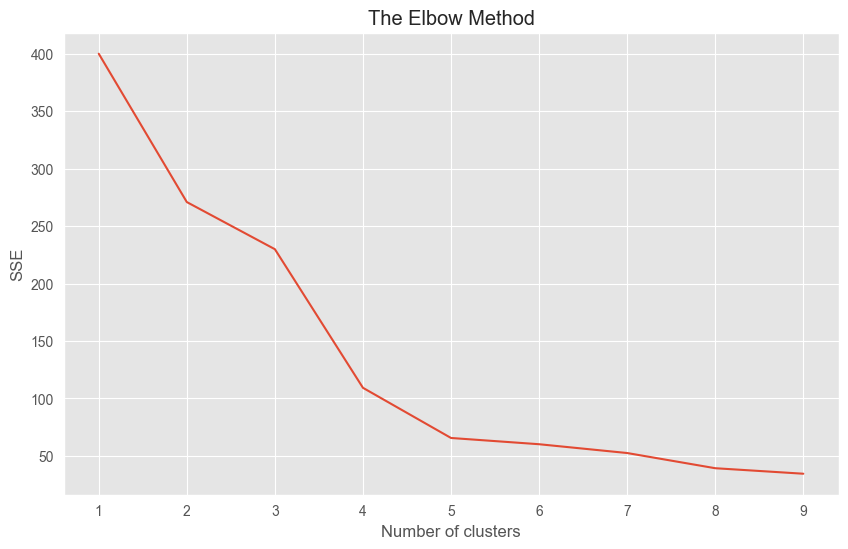

In [140]:
# --------------------------- RUN THIS CODE CELL  -------------------------------------
# The Elbow Method:
scores_2_3 = compare_number_of_clusters(scl_dataset.iloc[:,[2,3]], num_clusters_options, init_val, n_init_val, rand_state)

plt.plot(num_clusters_options,scores_2_3)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### 4.c.Select the best K-means number of clusters value
Complete the 'get_best_num_of_clusters_for_k_means' function to find the best  <br/>
    number of clusters for k-means clustering, on the 'mall customer information' dataset. <br/>
      
**You need to return** the <u>best score</u> and the <u>best value 'n_clusters' parameter</u>,<br/>
    using the silhouette score, when running K-means on the 'mall customer information' dataset.<br/>

<u>Note:</u> Use the `silhouette_score` to get the score on input dataset and the predicted values returned <br />
        after performing `fit` and `predict` for the  k-means model on the given dataset.<br /> 
 
It is suggested to use the previously implemented `perform_k_means` function to get the the predicted cluster values.

------

<u>Input parameters</u>:<br />
* dataset      - the dataset to run the K-means clustering on.
* num_cluster_options -  a list of the possible number of clusters values, to set the 'n_clusters' parameter with.
* init_val     - the value to set the 'init' method parameter with.
* n_init_val   - the vlue of the number of initializations to set the 'n_init' parameter with.
* rand_state   - the random state, which you should set each of the K-means to run with.

<u>Returned values</u>:<br />
* best_score - the best silhouette score
* num_clusters - the best number of clusters value.

------
    
<u>The return statement should look similar to the following statement</u>:<br />
return `best_score`, `num_clusters`

### 4.c. Instructions
<u>method name</u>: <b>get_best_num_of_clusters_for_k_means</b>
<pre>The following is expected:
--- Complete the 'get_best_num_of_clusters_for_k_means' function to find the best
    number of clusters for k-means clustering, on the 'mall customer information' dataset.

You need to return the best score and the best value 'n_clusters' parameter,
    using the silhouette score, when running K-means on the 'mall customer information' dataset.

Use the silhouette_score to get the score on input dataset and the predicted values returned
    after performing fit and predict for the k-means model on the given dataset.

* It is suggested to use the previously implemented 'perform_k_means' function to get 
   the the predicted cluster values.

For more information, see the explanation above.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return best_score, num_clusters</b>

In [ ]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [141]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def get_best_num_of_clusters_for_k_means(dataset, num_cluster_options, init_val, n_init_val, rand_state):
    best_score = -1
    num_clusters = -1
    for num_clusters_option in num_cluster_options:
        kmeans_model, predicted_vals = perform_k_means(dataset, num_clusters_option, init_val, n_init_val, rand_state)
        score = silhouette_score(dataset, predicted_vals)
        print(f"Num clusters: {num_clusters_option}, Score: {score}")
        if score >= best_score:
            best_score = score
            num_clusters = num_clusters_option
    return best_score, num_clusters


In [142]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters_options = [2,3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 1
rand_state = 42
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
best_score, best_num_clusters = get_best_num_of_clusters_for_k_means(scl_dataset.iloc[:,[2,3]], num_clusters_options, init_val, n_init_val, rand_state)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


Num clusters: 2, Score: 0.2932903073400332
Num clusters: 3, Score: 0.33258461628173436
Num clusters: 4, Score: 0.49434988482196784
Num clusters: 5, Score: 0.554657163111109
Num clusters: 6, Score: 0.513825753467656
Num clusters: 7, Score: 0.4590963204189487
Num clusters: 8, Score: 0.45627101567043893
Num clusters: 9, Score: 0.456135439647245


In [143]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [144]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.c. - Test 1 (name: test4c-1_get_best_num_of_clusters_for_k_means, points: 0.2)")
print ("\t--->Testing the implementation of 'get_best_num_of_clusters_for_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters_options = [2,3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 1
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    score, num_clusters = get_best_num_of_clusters_for_k_means(scl_dataset.iloc[:,[2,3]], num_clusters_options, init_val, n_init_val, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'get_best_num_of_clusters_for_k_means' function implementation :-)")

Part 4.c. - Test 1 (name: test4c-1_get_best_num_of_clusters_for_k_means, points: 0.2)
	--->Testing the implementation of 'get_best_num_of_clusters_for_k_means' ...
Num clusters: 2, Score: 0.2932903073400332
Num clusters: 3, Score: 0.33258461628173436
Num clusters: 4, Score: 0.49434988482196784
Num clusters: 5, Score: 0.554657163111109
Num clusters: 6, Score: 0.513825753467656
Num clusters: 7, Score: 0.4590963204189487
Num clusters: 8, Score: 0.45627101567043893
Num clusters: 9, Score: 0.456135439647245
Good Job!
You've passed the 1st test for the 'get_best_num_of_clusters_for_k_means' function implementation :-)


In [145]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.c. - Test 2 (name: test4c-2_get_best_num_of_clusters_for_k_means, points: 0.3)")
print ("\t--->Testing the implementation of 'get_best_num_of_clusters_for_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters_options = [2,3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 1
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    best_score, best_num_clusters = get_best_num_of_clusters_for_k_means(scl_dataset.iloc[:,[2,3]], num_clusters_options, init_val, n_init_val, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert best_num_clusters == 6, "Wrong value for best 'n_clusters' value"

print ("Good Job!\nYou've passed the 2nd test for the 'get_best_num_of_clusters_for_k_means' function implementation :-)")

Part 4.c. - Test 2 (name: test4c-2_get_best_num_of_clusters_for_k_means, points: 0.3)
	--->Testing the implementation of 'get_best_num_of_clusters_for_k_means' ...
Num clusters: 2, Score: 0.2932903073400332
Num clusters: 3, Score: 0.33258461628173436
Num clusters: 4, Score: 0.49434988482196784
Num clusters: 5, Score: 0.554657163111109
Num clusters: 6, Score: 0.513825753467656
Num clusters: 7, Score: 0.4590963204189487
Num clusters: 8, Score: 0.45627101567043893
Num clusters: 9, Score: 0.456135439647245


AssertionError: Wrong value for best 'n_clusters' value

In [146]:
# 4.c.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 4.c. - Test 3 (name: test4c-3_get_best_num_of_clusters_for_k_means, points: 0.3)")
print ("\t--->Testing the implementation of 'get_best_num_of_clusters_for_k_means' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters_options = [2,3,4,5,6,7,8,9]
init_val = 'k-means++'
n_init_val = 1
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    best_score, best_num_clusters = get_best_num_of_clusters_for_k_means(scl_dataset.iloc[:,[2,3]], num_clusters_options, init_val, n_init_val, rand_state)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

assert 0.51<= best_score <= 0.56, "Wrong best silhouette score"

print ("Good Job!\nYou've passed the 3rd test for the 'get_best_num_of_clusters_for_k_means' function implementation :-)")

Part 4.c. - Test 3 (name: test4c-3_get_best_num_of_clusters_for_k_means, points: 0.3)
	--->Testing the implementation of 'get_best_num_of_clusters_for_k_means' ...
Num clusters: 2, Score: 0.2932903073400332
Num clusters: 3, Score: 0.33258461628173436
Num clusters: 4, Score: 0.49434988482196784
Num clusters: 5, Score: 0.554657163111109
Num clusters: 6, Score: 0.513825753467656
Num clusters: 7, Score: 0.4590963204189487
Num clusters: 8, Score: 0.45627101567043893
Num clusters: 9, Score: 0.456135439647245
Good Job!
You've passed the 3rd test for the 'get_best_num_of_clusters_for_k_means' function implementation :-)


## 5. Hierarchical agglomerative clustering and DBSCAN hyperparameters
In this section you will perform the following:
* Find the best 'linkage' method for hierarchical agglomerative clustering
* Find the best combination of 'eps' and 'min_samples' values for DBSCAN clustering

### 5.a. Find best 'linkage' method for hierarchical agglomerative clustering
Complete the 'get_best_linkage_method' function to find the best linkage method for <br/>
   hierarchical agglomerative clustering on the 'mall customer information' dataset.<br/>
    
**You need to return** the <u>best score</u> and the <u>best value of the 'linkage' parameter</u>,<br/>
    using the silhouette score, when running hierarchical agglomerative clustering<br/>
        on the 'mall customer information' dataset.<br/>

<u>Note:</u> Use the `silhouette_score` to get the score on input dataset and the predicted values returned <br />
        after performing `fit` and `predict` for the hierarchical agglomerative clustering model <br />
        on the given dataset.<br /> 

It is suggested to use the previously implemented `perform_hierarchical_clustering` function to get the the predicted cluster values.

------

<u>Input parameters</u>:<br/>
* dataset        - the dataset to run the K-means clustering on comparison.
* num_clusters    - the number of clusters to set the 'n_clusters' parameter with 
* linkage_options - a list of the possible 'linkage' methods for K-means score comparison.

<u>Returned values</u>:<br />
* best_score         - the best silhouette score
* best_linkage_mehod - the best linkage method.

------
    
<u>The return statement should look similar to the following statement</u>:<br />
return `best_score`, `best_linkage_mehod`

### 5.a. Instructions
<u>method name</u>: <b>get_best_linkage_method</b>
<pre>The following is expected:
--- Complete the 'get_best_linkage_method' function to find the best linkage method for
      hierarchical agglomerative clustering on the 'mall customer information' dataset.

You need to return the best score and the best value of the 'linkage' parameter,
      using the silhouette score, when running hierarchical agglomerative clustering
      on the 'mall customer information' dataset.

Note: Use the silhouette_score to get the score on input dataset and the predicted values returned
     after performing fit and predict for the hierarchical agglomerative clustering model
     on the given dataset.

It is suggested to use the previously implemented 'perform_hierarchical_clustering' function to get the the predicted cluster values.

For more information, see the explanation above.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return best_score, best_linkage</b>

In [147]:
# 5.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [148]:
# 5.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def get_best_linkage_method(dataset, num_clusters, linkage_options):
    best_score = -1
    best_linkage = None
    for linkage_option in linkage_options:
        model, predicted_vals = perform_hierarchical_clustering(dataset, num_clusters, linkage_option)
        score = silhouette_score(dataset, predicted_vals)
        print(f"Linkage: {linkage_option}, Score: {score}")
        if score >= best_score:
            best_score = score
            best_linkage = linkage_option
    return best_score, best_linkage


In [149]:
# 5.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 5
# linkage_val one of the following: ‘ward’, ‘complete’, ‘average’, ‘single’
linkage_options = ['single', 'complete', 'average', 'ward']
rand_state = 42
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
best_score, best_linkage_method = get_best_linkage_method(scl_dataset.iloc[:,[2,3]], num_clusters, linkage_options)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


Linkage: single, Score: 0.2758004412314315
Linkage: complete, Score: 0.5391762674745034
Linkage: average, Score: 0.47942630818460846
Linkage: ward, Score: 0.5538089226688662


In [150]:
# 5.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [151]:
# 5.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.a. - Test 1 (name: test5a-1_get_best_linkage_method, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'get_best_linkage_method' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 5
# linkage_val one of the following: ‘ward’, ‘complete’, ‘average’, ‘single’
linkage_options = ['single', 'complete', 'average', 'ward']
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    best_score, best_linkage_method = get_best_linkage_method(scl_dataset.iloc[:,[2,3]], num_clusters, linkage_options)

except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'get_best_linkage_method' function implementation :-)")

Part 5.a. - Test 1 (name: test5a-1_get_best_linkage_method, points: 0.1) - Sanity
	--->Testing the implementation of 'get_best_linkage_method' ...
Linkage: single, Score: 0.2758004412314315
Linkage: complete, Score: 0.5391762674745034
Linkage: average, Score: 0.47942630818460846
Linkage: ward, Score: 0.5538089226688662
Good Job!
You've passed the 1st test for the 'get_best_linkage_method' function implementation :-)


In [152]:
# 5.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.a. - Test 2 (name: test5a-2_get_best_linkage_method, points: 0.2)")
print ("\t--->Testing the implementation of 'get_best_linkage_method' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 5
# linkage_val one of the following: ‘ward’, ‘complete’, ‘average’, ‘single’
linkage_options = ['single', 'complete', 'average', 'ward']
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    best_score, best_linkage_method = get_best_linkage_method(scl_dataset.iloc[:,[2,3]], num_clusters, linkage_options)

except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert best_linkage_method == 'ward', "Wrong value for best 'linkage' value"

print ("Good Job!\nYou've passed the 2nd test for the 'get_best_linkage_method' function implementation :-)")

Part 5.a. - Test 2 (name: test5a-2_get_best_linkage_method, points: 0.2)
	--->Testing the implementation of 'get_best_linkage_method' ...
Linkage: single, Score: 0.2758004412314315
Linkage: complete, Score: 0.5391762674745034
Linkage: average, Score: 0.47942630818460846
Linkage: ward, Score: 0.5538089226688662
Good Job!
You've passed the 2nd test for the 'get_best_linkage_method' function implementation :-)


In [153]:
# 5.a.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.a. - Test 3 (name: test5a-3_get_best_linkage_method, points: 0.2)")
print ("\t--->Testing the implementation of 'get_best_linkage_method' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
num_clusters = 5
# linkage_val one of the following: ‘ward’, ‘complete’, ‘average’, ‘single’
linkage_options = ['single', 'complete', 'average', 'ward']
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    scl_dataset = pd.DataFrame(scale_dataset(num_dataset),index=num_dataset.index,columns=num_dataset.columns)
    best_score, best_linkage_method = get_best_linkage_method(scl_dataset.iloc[:,[2,3]], num_clusters, linkage_options)

except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

assert 0.54 <= best_score <= 0.57, "Wrong best silhouette score"

print ("Good Job!\nYou've passed the 3rd test for the 'get_best_linkage_method' function implementation :-)")

Part 5.a. - Test 3 (name: test5a-3_get_best_linkage_method, points: 0.2)
	--->Testing the implementation of 'get_best_linkage_method' ...
Linkage: single, Score: 0.2758004412314315
Linkage: complete, Score: 0.5391762674745034
Linkage: average, Score: 0.47942630818460846
Linkage: ward, Score: 0.5538089226688662
Good Job!
You've passed the 3rd test for the 'get_best_linkage_method' function implementation :-)


### 5.b. Find the best combination of 'eps' and 'min_samples' values for DBSCAN clustering
Complete the 'get_best_params_for_dbscan' function to find the best parameter permutation <br/>
   for running density based clustering (DBSCAN) on the 'mall customer information' dataset. <br/>
      
**You need to return** the <u>best score</u> and the <u>best combination of the<br/>
    'eps' and 'min_samples' values for DBSCAN clustering, using the silhouette score, <br/>
         when running density based clustering on the 'mall customer information' dataset.<br/>

<u>Note:</u> Use the `silhouette_score` to get the score on input dataset and the predicted values returned <br />
        after performing `fit` and `predict` for the density based clustering model <br />
        on the given dataset.<br />     
    
It is suggested to use the previously implemented `perform_density_based_clustering` function to get the the predicted cluster values.
    
------

<u>Input parameters</u>:<br/>
* dataset        - the dataset to run the K-means clustering on comparison.
* eps_options    - a list of the possible 'eps' values
* min_samples_options - a list of the possible 'min_samples' methods for values.

<u>Returned values</u>:<br />
* best_score       - the best silhouette score
* best_eps         - the best `eps` value
* best_min_samples - the best `min_samples` value
    
<u>The return statement should look similar to the following statement</u>:<br />
return `best_score`, `best_eps`, `best_min_samples`

### 5.b. Instructions
<u>method name</u>: <b>get_best_params_for_dbscan</b>
<pre>The following is expected:
--- Complete the 'get_best_params_for_dbscan' function to find the best parameter permutation
     for running density based clustering (DBSCAN) on the 'mall customer information' dataset.

You need to return the best score and the best combination of the
    'eps' and 'min_samples' values for DBSCAN clustering, using the silhouette score,
    when running density based clustering on the 'mall customer information' dataset.

Note: Use the silhouette_score to get the score on input dataset and the predicted values returned
     after performing fit and predict for the density based clustering model on the given dataset.

It is suggested to use the previously implemented 'perform_density_based_clustering' function to
     get the the predicted cluster values.

For more information, see the explanation above.
</pre>
<hr>
The return statement should look similar to the following statement:<br />
<b>return best_score, best_eps, best_min_samples</b>

In [154]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ASSISTANCE TO ANSWER 
# ---- Add assistance code here IF NEEDED:
###
### YOUR CODE HERE
###


In [155]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: ANSWER 

def get_best_params_for_dbscan(dataset, eps_options, min_samples_options):
    best_score = -1
    best_eps = None
    best_min_samples = None
    for eps in eps_options:
        for min_samples in min_samples_options:
            model, predicted_vals = perform_density_based_clustering(dataset, eps, min_samples)
            score = silhouette_score(dataset, predicted_vals)
            print(f"EPS: {eps}, Min samples: {min_samples}, Score: {score}")
            if score >= best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
    return best_score, best_eps, best_min_samples


In [156]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation)
# === CODE TYPE: SELF TESTING
# Use the following code to test your implementation:
file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
eps_options = [10,11,12]
min_samples_options = [4,5,6,7,8]
rand_state = 42
raw_dataset = load_dataset(file_name)
cln_dataset = remove_missing_values(raw_dataset)
cln_dataset = remove_duplicate_rows(cln_dataset)
num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
# subset of dataset:
num_dataset_2_3 = num_dataset.iloc[:,[2,3]]
# no scaling here 
best_score, best_eps, best_min_samples = get_best_params_for_dbscan(num_dataset_2_3, eps_options, min_samples_options)
# --- add additional code to check your code if needed:
###
### YOUR CODE HERE
###


EPS: 10, Min samples: 4, Score: 0.19409348453031328
EPS: 10, Min samples: 5, Score: 0.13243683650522683
EPS: 10, Min samples: 6, Score: 0.0682845543476737
EPS: 10, Min samples: 7, Score: -0.052480799239418854
EPS: 10, Min samples: 8, Score: -0.011223698475191318
EPS: 11, Min samples: 4, Score: 0.2184838299434761
EPS: 11, Min samples: 5, Score: 0.20763898502516057
EPS: 11, Min samples: 6, Score: 0.12815278662734694
EPS: 11, Min samples: 7, Score: 0.10091971104029444
EPS: 11, Min samples: 8, Score: 0.008058765128041592
EPS: 12, Min samples: 4, Score: 0.24607986757257072
EPS: 12, Min samples: 5, Score: 0.2226606442691611
EPS: 12, Min samples: 6, Score: 0.20763898502516057
EPS: 12, Min samples: 7, Score: 0.11085669987373396
EPS: 12, Min samples: 8, Score: 0.043121392847964304


In [157]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run after implementation, if used)
# === CODE TYPE: SELF TESTING
# ---- Add your additional tests here if needed:
###
### YOUR CODE HERE
###


In [158]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.b. - Test 1 (name: test5b-1_get_best_params_for_dbscan, points: 0.1) - Sanity")
print ("\t--->Testing the implementation of 'get_best_params_for_dbscan' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
eps_options = [10,11,12]
min_samples_options = [4,5,6,7,8]
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    # subset of dataset:
    num_dataset_2_3 = num_dataset.iloc[:,[2,3]]
    # no scaling here 
    best_score, best_eps, best_min_samples = get_best_params_for_dbscan(num_dataset_2_3, eps_options, min_samples_options)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

print ("Good Job!\nYou've passed the 1st test for the 'get_best_params_for_dbscan' function implementation :-)")

Part 5.b. - Test 1 (name: test5b-1_get_best_params_for_dbscan, points: 0.1) - Sanity
	--->Testing the implementation of 'get_best_params_for_dbscan' ...
EPS: 10, Min samples: 4, Score: 0.19409348453031328
EPS: 10, Min samples: 5, Score: 0.13243683650522683
EPS: 10, Min samples: 6, Score: 0.0682845543476737
EPS: 10, Min samples: 7, Score: -0.052480799239418854
EPS: 10, Min samples: 8, Score: -0.011223698475191318
EPS: 11, Min samples: 4, Score: 0.2184838299434761
EPS: 11, Min samples: 5, Score: 0.20763898502516057
EPS: 11, Min samples: 6, Score: 0.12815278662734694
EPS: 11, Min samples: 7, Score: 0.10091971104029444
EPS: 11, Min samples: 8, Score: 0.008058765128041592
EPS: 12, Min samples: 4, Score: 0.24607986757257072
EPS: 12, Min samples: 5, Score: 0.2226606442691611
EPS: 12, Min samples: 6, Score: 0.20763898502516057
EPS: 12, Min samples: 7, Score: 0.11085669987373396
EPS: 12, Min samples: 8, Score: 0.043121392847964304
Good Job!
You've passed the 1st test for the 'get_best_params_fo

In [159]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.b. - Test 2 (name: test5b-2_get_best_params_for_dbscan, points: 0.2)")
print ("\t--->Testing the implementation of 'get_best_params_for_dbscan' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
eps_options = [10,11,12]
min_samples_options = [4,5,6,7,8]
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    # subset of dataset:
    num_dataset_2_3 = num_dataset.iloc[:,[2,3]]
    # no scaling here 
    best_score, best_eps, best_min_samples = get_best_params_for_dbscan(num_dataset_2_3, eps_options, min_samples_options)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 

assert best_eps == 12, "Wrong value for best 'eps' value"
assert best_min_samples == 4, "Wrong value for best 'min_samples' value"

print ("Good Job!\nYou've passed the 2nd test for the 'get_best_params_for_dbscan' function implementation :-)")

Part 5.b. - Test 2 (name: test5b-2_get_best_params_for_dbscan, points: 0.2)
	--->Testing the implementation of 'get_best_params_for_dbscan' ...
EPS: 10, Min samples: 4, Score: 0.19409348453031328
EPS: 10, Min samples: 5, Score: 0.13243683650522683
EPS: 10, Min samples: 6, Score: 0.0682845543476737
EPS: 10, Min samples: 7, Score: -0.052480799239418854
EPS: 10, Min samples: 8, Score: -0.011223698475191318
EPS: 11, Min samples: 4, Score: 0.2184838299434761
EPS: 11, Min samples: 5, Score: 0.20763898502516057
EPS: 11, Min samples: 6, Score: 0.12815278662734694
EPS: 11, Min samples: 7, Score: 0.10091971104029444
EPS: 11, Min samples: 8, Score: 0.008058765128041592
EPS: 12, Min samples: 4, Score: 0.24607986757257072
EPS: 12, Min samples: 5, Score: 0.2226606442691611
EPS: 12, Min samples: 6, Score: 0.20763898502516057
EPS: 12, Min samples: 7, Score: 0.11085669987373396
EPS: 12, Min samples: 8, Score: 0.043121392847964304
Good Job!
You've passed the 2nd test for the 'get_best_params_for_dbscan'

In [160]:
# 5.b.
# ------------>>>>>>>> RUN THIS CODE CELL <<<<<<<<------------
# --------  (run only)
# === CODE TYPE: GRADED TEST 

print ("Part 5.b. - Test 3 (name: test5b-3_get_best_params_for_dbscan, points: 0.2)")
print ("\t--->Testing the implementation of 'get_best_params_for_dbscan' ...")

file_name = '.' + os.sep + 'data' + os.sep + 'mall_customer_information.csv'
eps_options = [10,11,12]
min_samples_options = [4,5,6,7,8]
rand_state = 42

try:
    raw_dataset = load_dataset(file_name)
    cln_dataset = remove_missing_values(raw_dataset)
    cln_dataset = remove_duplicate_rows(cln_dataset)
    num_dataset = transfer_str_to_numeric_vals(cln_dataset, 'gender', 'customer_id')
    # subset of dataset:
    num_dataset_2_3 = num_dataset.iloc[:,[2,3]]
    # no scaling here 
    best_score, best_eps, best_min_samples = get_best_params_for_dbscan(num_dataset_2_3, eps_options, min_samples_options)
except Exception as e:
    print ('You probably have a syntax error, we got the following exception:')
    print ('\tError Message:', str(e))
    print ('Try fixing your implementation')
    raise 
    
assert 0.24<= best_score <= 0.249, "Wrong best silhouette score"

print ("Good Job!\nYou've passed the 3rd test for the 'get_best_params_for_dbscan' function implementation :-)")

Part 5.b. - Test 3 (name: test5b-3_get_best_params_for_dbscan, points: 0.2)
	--->Testing the implementation of 'get_best_params_for_dbscan' ...
EPS: 10, Min samples: 4, Score: 0.19409348453031328
EPS: 10, Min samples: 5, Score: 0.13243683650522683
EPS: 10, Min samples: 6, Score: 0.0682845543476737
EPS: 10, Min samples: 7, Score: -0.052480799239418854
EPS: 10, Min samples: 8, Score: -0.011223698475191318
EPS: 11, Min samples: 4, Score: 0.2184838299434761
EPS: 11, Min samples: 5, Score: 0.20763898502516057
EPS: 11, Min samples: 6, Score: 0.12815278662734694
EPS: 11, Min samples: 7, Score: 0.10091971104029444
EPS: 11, Min samples: 8, Score: 0.008058765128041592
EPS: 12, Min samples: 4, Score: 0.24607986757257072
EPS: 12, Min samples: 5, Score: 0.2226606442691611
EPS: 12, Min samples: 6, Score: 0.20763898502516057
EPS: 12, Min samples: 7, Score: 0.11085669987373396
EPS: 12, Min samples: 8, Score: 0.043121392847964304
Good Job!
You've passed the 3rd test for the 'get_best_params_for_dbscan'